# Importing the TensorFlow Dataset Library and creating the list for the Dataset

In [23]:
import tensorflow_datasets as tfds
datasets_list = tfds.list_builders()
print("food101" in datasets_list)

True


# Loading the Food101 Dataset from the library of TensorFlow Datasets

In [24]:
#loading the data from the library
(train_data, test_data), ds_info = tfds.load("food101", split=["train", "validation"],
                                             shuffle_files=True,
                                             as_supervised=True, #Data gets returned into tuple format (data, label)
                                             with_info=True)

# Explore the Food101 Dataset

In [25]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [26]:
# Get the Class name
class_name = ds_info.features["label"].names
class_name[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [27]:
# Take one smaple of train data
train_one_sample = train_data.take(1)
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [28]:
# Output info of our training sample
for image, label in train_one_sample:
  print(f"""
  Image shape: {image.shape},
        Image datatypr: {image.dtype},
        Target call from Food101 (tensor form): {label}
        Class name (str form): {class_name[label.numpy()]}
        """)


  Image shape: (512, 512, 3),
        Image datatypr: <dtype: 'uint8'>,
        Target call from Food101 (tensor form): 8
        Class name (str form): bread_pudding
        


# Checking the image that has been loaded in the form of Tensors

In [29]:
# What does our image tensor form TFDS's Food 101 look like?
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[18,  6,  8],
        [18,  6,  8],
        [18,  6,  8],
        ...,
        [30, 15, 22],
        [29, 14, 21],
        [26, 11, 18]],

       [[22, 10, 12],
        [21,  9, 11],
        [20,  8, 10],
        ...,
        [35, 20, 27],
        [31, 16, 23],
        [26, 11, 18]],

       [[23, 13, 14],
        [21, 11, 12],
        [19,  9, 10],
        ...,
        [39, 26, 33],
        [36, 21, 28],
        [30, 15, 22]],

       ...,

       [[15,  4,  8],
        [15,  4,  8],
        [14,  5, 10],
        ...,
        [41,  9, 10],
        [39,  7,  8],
        [36,  4,  5]],

       [[16,  5,  9],
        [16,  5,  9],
        [16,  5, 11],
        ...,
        [42, 12, 12],
        [39,  9,  9],
        [35,  5,  5]],

       [[15,  4,  8],
        [15,  4,  8],
        [16,  5, 11],
        ...,
        [41, 11, 11],
        [39,  9,  9],
        [35,  5,  5]]], dtype=uint8)>

In [30]:
#What are the minimum an dmaximum va;ues of our image? this should range between 0 t0 255
import tensorflow as tf
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

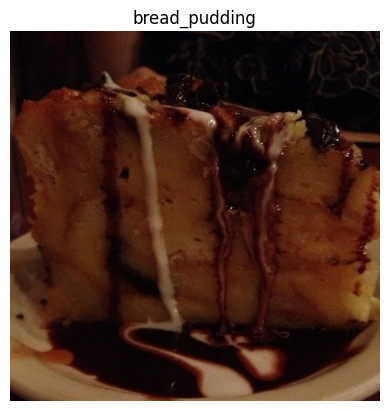

In [31]:
# Plot an image from tensorflow dataset
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_name[label.numpy()])
plt.axis(False);

# Create Pre-Processing Functions of our data
Neural Network perform best when data is in a specifc way: batched, normal etc

But in real life not all data are in the above form.
Hence we perform Pre-processing of the image.

Infromations we have
* In uint8 datatype
* Comprised of all different size tensors(different sized images)
* Not Scaled (images between 0 to 255 pixel size)

Post Pre-processing the data should be:
* dtype should be float32
* for batches, TensorFlow all should have the same size within a batch
* Scaled (values between 0 and 1) known as normalization of tensors

We will be using EfficintNetBX pretrained model from tf.keras.applications we dont need to rescale our data.

Hence this would do:
1. Reshape our images to all the same size
2. Convert the dtype of our image tensors from uint8 to float32

In [32]:
# Make a function for Pre=Processing image:
def preprocess_img(image, label, img_shape=224):
  """
  Convert image datatype from 'uint8' -> 'float32 aand reshapes
  image to [img_shape, img_shape, colur_channels]

  """
  image = tf.image.resize(image, [img_shape, img_shape]) # reshapes the target image
  return tf.cast(image, tf.float32), label # return (float32_image and label) tuple

In [33]:
#Preprocess a single sample image and check the outputs
preprocessed_image = preprocess_img(image, label)[0]

print(f"Image before preprocessing:\n {image[:2]}...,\nShape: {image.shape}, \nDatatype: {image.dtype}\n")
print(f"Image after preprocessing:\n {preprocessed_image[:2]}..., \nShape: {preprocessed_image.shape}, \nDatatype: {preprocessed_image.dtype}")

Image before preprocessing:
 [[[18  6  8]
  [18  6  8]
  [18  6  8]
  ...
  [30 15 22]
  [29 14 21]
  [26 11 18]]

 [[22 10 12]
  [21  9 11]
  [20  8 10]
  ...
  [35 20 27]
  [31 16 23]
  [26 11 18]]]...,
Shape: (512, 512, 3), 
Datatype: <dtype: 'uint8'>

Image after preprocessing:
 [[[20.158163   8.158163  10.158163 ]
  [18.42347    7.6173472  9.020408 ]
  [15.010203   6.423469   9.285714 ]
  ...
  [26.285824  15.714351  23.07156  ]
  [31.091867  17.285728  24.285728 ]
  [28.754953  13.754952  20.754953 ]]

 [[18.92857    8.928571   9.928571 ]
  [16.214285   7.0765305  8.07653  ]
  [14.739796   8.571429  10.627552 ]
  ...
  [26.444029  15.872557  21.658293 ]
  [39.86226   26.862259  33.86226  ]
  [39.49479   24.494787  31.494787 ]]]..., 
Shape: (224, 224, 3), 
Datatype: <dtype: 'float32'>


## Batching and prepare Image dataset
Preparation of Data input Pipeline


In [34]:
# Map preprocessing function to training (and parallelize)
train_data = train_data.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle train data and turn into Batches and prefetch it(load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Map preprocessing Function to test data
test_data = test_data.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# num_parallel_calls=tf.data.AUTOTUNE): is done to speed up by utilize the CPU
# prefetch(buffer_size=tf.data.AUTOTUNE): is done to keep the next batch of images ready
# batch(batch_size=32): creates the batches from the image dataset with the size of 32

In [35]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

# Creating Modelling Callbacks
We will create some callbacks to help our model trains:
* TensorBoard
*MOdelCheckpoint callback

In [36]:
# Create tensorboard callback Function

import datetime # Import Datetime Module

def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instance to store log files.
  Stores logs in `dir_name/experiment_name`
  "dir_name/experiment_name/current_datetime/"

  Args:
  dir_name: target directory to store TensorBoard log files
  experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [37]:
# ModelCheckpoint callback to save a model's progress during training
checkpoint_path = "model_checkpoints/cp.ckpt.weights.h5"

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor = "val_acc",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      verbose=0) #dont print wether or not model is being saved

# Setup Mixed Precision training
This is done to speed up the model performace by setting a combination of float32 and float16 data types

In [38]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16") # Set Global data policy to mixed precision

In [39]:
print(mixed_precision.global_policy())

<DTypePolicy "mixed_float16">


# Build Feature Extraction Models

In [40]:
from tensorflow.keras import layers
# from tensorflow.keras.layers.experimental import preprocessing

# Create base model
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create Functional Models
inputs = layers.Input(shape=input_shape, name="input_layer")
#Note: EfficientNetBX model have rescaling built-in

x = base_model(inputs, training=False) #make sure layers should be inference mode only stay like that
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(len(class_name))(x)

outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32") (x)
model = tf.keras.Model(inputs, outputs)

# Compile the Model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


In [41]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 101)                 │         129,381 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cast_3 (Cast)                        │ (None, 101)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_float32 (Activation)         │ (None, 101)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,178,952 (15.94 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

# Checking the data types of layer components in Model

In [42]:
# Checking the layer dtypes
for layer in model.layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <DTypePolicy "mixed_float16">
efficientnetb0 False float32 <DTypePolicy "mixed_float16">
global_average_pooling2d_1 True float32 <DTypePolicy "mixed_float16">
dense_1 True float32 <DTypePolicy "mixed_float16">
softmax_float32 True float32 <DTypePolicy "float32">


# Fit the feature extraction model
 fine-Tune the model by:
 1. Build Feature extraction model (train a couple output layers with base layers frozen)
 2. Fine tune the Frozen layer

In [43]:
# fit the feature extraction model with callbacks
history_101_food_classes_feature_extrat = model.fit(train_data,
                                                    epochs =3,
                                                    steps_per_epoch=(len(train_data)),
                                                   validation_data=test_data,
                                                    validation_steps=int(0.5 * len(test_data)),
                                                    callbacks=[create_tensorboard_callback(dir_name="training_logs",
                                                                                           experiment_name="efficientb0_101_classes_all_data_feature_extras"),
                                                    model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientb0_101_classes_all_data_feature_extras/20250120-163308
Epoch 1/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 219s 84ms/step - accuracy: 0.4362 - loss: 2.4612 - val_accuracy: 0.6562 - val_loss: 1.3078
Epoch 2/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6561 - val_loss: 1.3101
Epoch 3/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 191s 68ms/step - accuracy: 0.6309 - loss: 1.4522


# Fit and build our Feature Extraction Model
1. Our Goal is to build a feature extraction Model(train a couple output layers with base layers frozen)
2. Fine-Tune some of the frozen layers

In [45]:
history_101_food_classes_feature_extrat = model.fit(train_data,
                                                    epochs=3,
                                                    steps_per_epoch = (len(train_data)),
                                                    validation_data = test_data,
                                                    validation_steps = int(0.15 * len(test_data)),
                                                    callbacks=[create_tensorboard_callback(dir_name="training_logs",
                                                                                          experiment_name = "efficientnetb0_101_classes_features_extract"),
                                                    model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetb0_101_classes_features_extract/20250120-170105
Epoch 1/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 178s 74ms/step - accuracy: 0.6673 - loss: 1.2788 - val_accuracy: 0.6909 - val_loss: 1.1379
Epoch 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_acc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)
/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2368/2368 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6798 - val_loss: 1.1758
Epoch 3/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 199s 76ms/step - accuracy: 0.6912 - loss: 1.1838 - val_accuracy: 0.6803 - val_loss: 1.1424


In [46]:
# Evaluate the model on the whole test dataset
result = model.evaluate(test_data)
result # printing out the result value

790/790 ━━━━━━━━━━━━━━━━━━━━ 52s 66ms/step - accuracy: 0.6896 - loss: 1.1366


[1.1300326585769653, 0.6925544738769531]

# Fine Tuning the model to get expected result above 70%